## Створення штучного набору даних для розрахунку регресії

In [1]:
# load and summarize the dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (670, 100) (670,)
Test (330, 100) (330,)


## Вибір підмножини ознак

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

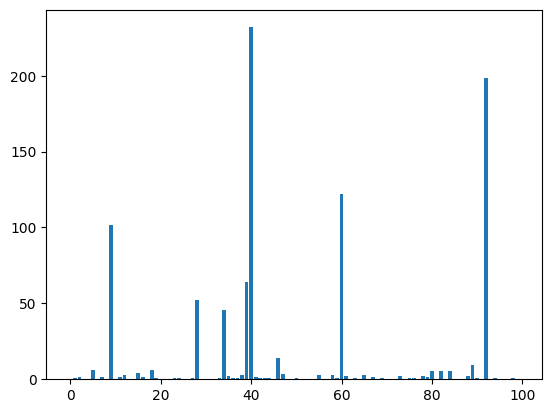

In [2]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Вибір ознак за допомогою mutual information

Feature 0: 0.045484
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.024816
Feature 5: 0.000000
Feature 6: 0.022659
Feature 7: 0.000000
Feature 8: 0.000000
Feature 9: 0.074320
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.000000
Feature 14: 0.020390
Feature 15: 0.004307
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.016566
Feature 19: 0.003688
Feature 20: 0.007579
Feature 21: 0.018640
Feature 22: 0.025206
Feature 23: 0.017967
Feature 24: 0.069173
Feature 25: 0.000000
Feature 26: 0.022232
Feature 27: 0.000000
Feature 28: 0.007849
Feature 29: 0.012849
Feature 30: 0.017402
Feature 31: 0.008083
Feature 32: 0.047321
Feature 33: 0.002829
Feature 34: 0.028968
Feature 35: 0.000000
Feature 36: 0.071652
Feature 37: 0.027969
Feature 38: 0.000000
Feature 39: 0.064796
Feature 40: 0.137695
Feature 41: 0.008732
Feature 42: 0.003983
Feature 43: 0.000000
Feature 44: 0.009387
Feature 45: 0.000000
Feature 46: 0.038385
Feature 47: 0.000000
Fe

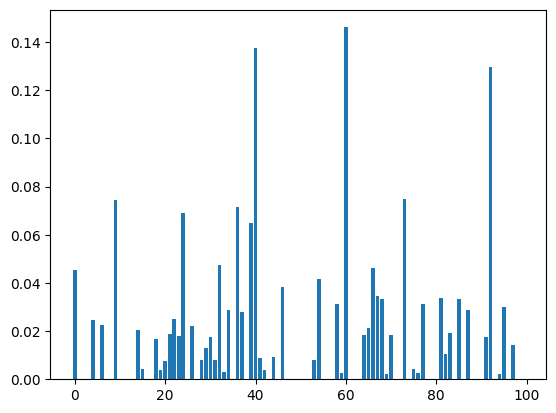

In [3]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Модель з усіма ознаками

In [4]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.086


##Вибір підмножини ознак за f_regression

In [5]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 2.740


In [6]:
# evaluation of a model using 88 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.085


## Вибір ознак за mutual_info

In [7]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=mutual_info_regression, k=88)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.084


## Вибір кількості ознак

>81 -0.082 (0.006)
>82 -0.082 (0.006)
>83 -0.082 (0.006)
>84 -0.082 (0.006)
>85 -0.082 (0.006)
>86 -0.082 (0.006)
>87 -0.082 (0.006)
>88 -0.082 (0.006)
>89 -0.083 (0.006)
>90 -0.083 (0.006)
>91 -0.083 (0.006)
>92 -0.083 (0.006)
>93 -0.083 (0.006)
>94 -0.083 (0.006)
>95 -0.083 (0.006)
>96 -0.083 (0.006)
>97 -0.083 (0.006)
>98 -0.083 (0.006)
>99 -0.083 (0.006)
>100 -0.083 (0.006)


C:\Users\1234\AppData\Local\Temp\ipykernel_20656\1153417624.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=num_features, showmeans=True)


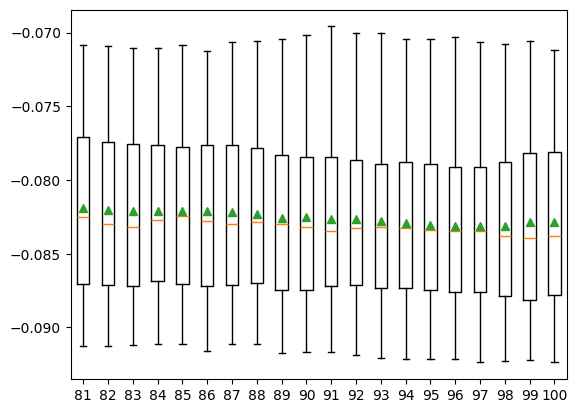

In [8]:
# compare different numbers of features selected using mutual information
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LinearRegression()
	fs = SelectKBest(score_func=mutual_info_regression, k=k)
	pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
	# evaluate the model
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

In [9]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# define dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -0.010
Best Config: {'sel__k': 81}
>-50.101 with: {'sel__k': 80}
>-0.010 with: {'sel__k': 81}
>-0.010 with: {'sel__k': 82}
>-0.010 with: {'sel__k': 83}
>-0.010 with: {'sel__k': 84}
>-0.010 with: {'sel__k': 85}
>-0.010 with: {'sel__k': 86}
>-0.010 with: {'sel__k': 87}
>-0.010 with: {'sel__k': 88}
>-0.010 with: {'sel__k': 89}
>-0.010 with: {'sel__k': 90}
>-0.011 with: {'sel__k': 91}
>-0.011 with: {'sel__k': 92}
>-0.011 with: {'sel__k': 93}
>-0.011 with: {'sel__k': 94}
>-0.011 with: {'sel__k': 95}
>-0.011 with: {'sel__k': 96}
>-0.011 with: {'sel__k': 97}
>-0.011 with: {'sel__k': 98}
>-0.011 with: {'sel__k': 99}
>-0.011 with: {'sel__k': 100}
